In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel("houses_for_rent_madrid.xlsx")

In [3]:
data.dtypes

Id                int64
District         object
Address          object
Number           object
Area             object
Rent              int64
Bedrooms        float64
Sq.Mt             int64
Floor           float64
Outer           float64
Elevator        float64
Penthouse         int64
Cottage           int64
Duplex            int64
Semidetached      int64
dtype: object

In [4]:
data.describe(include='all')

,Id,District,Address,Number,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,2089.000000,2089,2089,747,2085,2089.000000,2000.000000,2089.000000,1948.000000,1927.000000,1956.000000,2089.000000,2089.000000,2089.000000,2089.000000
unique,NaN,20,1336,137,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Salamanca,Piso en Recoletos,1,Recoletos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,313,25,29,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1094.026807,NaN,NaN,NaN,NaN,1932.249402,2.483000,128.919579,25.662731,0.867151,0.880879,0.080900,0.042125,0.030637,0.013404
std,630.612544,NaN,NaN,NaN,NaN,1495.474485,1.305206,115.745014,975.065350,0.339500,0.324013,0.272747,0.200923,0.172373,0.115023
min,1.000000,NaN,NaN,NaN,NaN,450.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,550.000000,NaN,NaN,NaN,NaN,950.000000,2.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1094.000000,NaN,NaN,NaN,NaN,1400.000000,2.000000,90.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1636.000000,NaN,NaN,NaN,NaN,2500.000000,3.000000,147.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
data.shape

(2089, 15)

## Part 1: Remove columns "Id", "District", "Address", "Number"

In [6]:
data = data.drop(['Id', 'District', 'Address', 'Number'], axis=1) #removing the specified columns from the DataFrame
data.describe(include='all') # i am describing the dataframe again to make sure the columns are removed

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
count,2085,2089.000000,2000.000000,2089.000000,1948.000000,1927.000000,1956.000000,2089.000000,2089.000000,2089.000000,2089.000000
unique,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Recoletos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1932.249402,2.483000,128.919579,25.662731,0.867151,0.880879,0.080900,0.042125,0.030637,0.013404
std,NaN,1495.474485,1.305206,115.745014,975.065350,0.339500,0.324013,0.272747,0.200923,0.172373,0.115023
min,NaN,450.000000,0.000000,15.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,950.000000,2.000000,65.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,1400.000000,2.000000,90.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,2500.000000,3.000000,147.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


## Part 2: Imputate missing "Bedrooms", "Floors" and "Sq.Mt"

In [7]:
num_missing = data.isna().sum()
num_missing # here i am getting the the missing numbers for the requested features before proceeding with the imputation just for the sake of comparision and validation

Area              4
Rent              0
Bedrooms         89
Sq.Mt             0
Floor           141
Outer           162
Elevator        133
Penthouse         0
Cottage           0
Duplex            0
Semidetached      0
dtype: int64

In [8]:
data

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,Malasaña-Universidad,2490,3.0,97,7.0,1.0,1.0,1,0,0,0
1,Simancas,1300,3.0,110,4.0,1.0,1.0,0,0,0,0
2,Chueca-Justicia,800,NaN,33,NaN,NaN,0.0,0,0,0,0
3,San Isidro,600,1.0,45,2.0,1.0,1.0,0,0,0,0
4,Acacias,1900,1.0,90,7.0,1.0,1.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2084,Lavapiés-Embajadores,1450,3.0,100,4.0,1.0,1.0,0,0,0,0
2085,Marroquina,900,3.0,85,4.0,1.0,1.0,0,0,0,0
2086,Castellana,3500,5.0,300,3.0,1.0,1.0,0,0,0,0
2087,Arapiles,1299,2.0,90,0.0,0.0,1.0,0,0,0,0


In [9]:
data.loc[:,["Bedrooms"]] = data["Bedrooms"].fillna(data["Bedrooms"].median())
data.loc[:,["Floor"]]= data["Floor"].fillna(data["Floor"].median())
data.loc[:,["Sq.Mt"]] = data["Sq.Mt"].fillna(data["Sq.Mt"].median())

In [10]:
num_missing1 = data.isna().sum()
num_missing1
# now if we compare with previous num_missing we will see that there are no more missing values for the requested features

Area              4
Rent              0
Bedrooms          0
Sq.Mt             0
Floor             0
Outer           162
Elevator        133
Penthouse         0
Cottage           0
Duplex            0
Semidetached      0
dtype: int64

## Part 3: Remove all rows with a missing value.
(Note: "Bedrooms", "Floor" and "Area" should not have missing value because of the imputation in the last part).

In [11]:
num_missing2 = data.isna().sum()
num_missing2
# i did this again to make sure that there are no more missing values for the previously requested features before proceeding 

Area              4
Rent              0
Bedrooms          0
Sq.Mt             0
Floor             0
Outer           162
Elevator        133
Penthouse         0
Cottage           0
Duplex            0
Semidetached      0
dtype: int64

In [12]:
data = data.dropna() 
# here i am removing all the rows from dataframe that has missing values and as you can the number of rows dropped from 2089 to 1917
data

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached
0,Malasaña-Universidad,2490,3.0,97,7.0,1.0,1.0,1,0,0,0
1,Simancas,1300,3.0,110,4.0,1.0,1.0,0,0,0,0
3,San Isidro,600,1.0,45,2.0,1.0,1.0,0,0,0,0
4,Acacias,1900,1.0,90,7.0,1.0,1.0,1,0,0,0
5,Ibiza,1500,4.0,110,3.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2084,Lavapiés-Embajadores,1450,3.0,100,4.0,1.0,1.0,0,0,0,0
2085,Marroquina,900,3.0,85,4.0,1.0,1.0,0,0,0,0
2086,Castellana,3500,5.0,300,3.0,1.0,1.0,0,0,0,0
2087,Arapiles,1299,2.0,90,0.0,0.0,1.0,0,0,0,0


In [13]:
num_missing3 = data.isna().sum()
# here i am confirming that all the features has no missing values anymore (DISREGARD THE AREA_IMPACT AS I ADDED THAT THIS CODE AFTER I FINISHED EVERYTHING WITH THE DOCUMENTATION)
num_missing3

Area            0
Rent            0
Bedrooms        0
Sq.Mt           0
Floor           0
Outer           0
Elevator        0
Penthouse       0
Cottage         0
Duplex          0
Semidetached    0
dtype: int64

## Part 4: Plot a histogram of Bedrooms, Floor and Sq.Mt

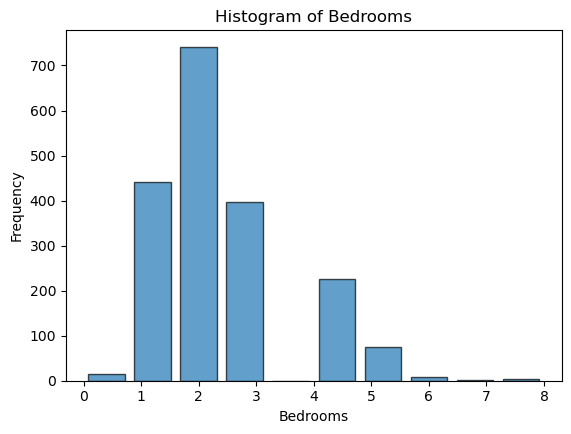

In [40]:
# Histogram
plt.hist(data["Bedrooms"], bins=10, edgecolor='black', alpha=0.7, rwidth=0.8)

# Labels and title
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Histogram of Bedrooms')

# Spacing between bars
plt.subplots_adjust(bottom=0.15)

plt.show()

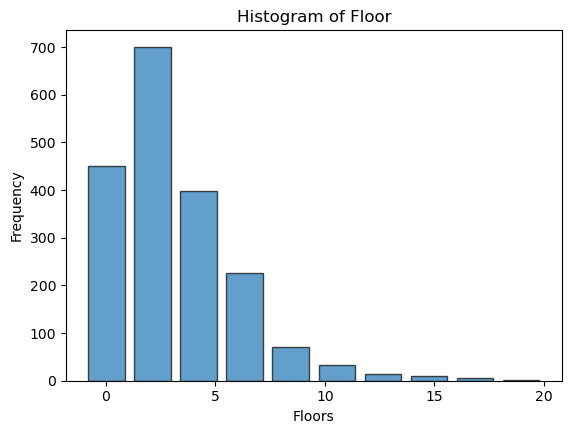

In [41]:
# Histogram
plt.hist(data["Floor"], bins=10, edgecolor='black', alpha=0.7, rwidth=0.8)

# Labels and title
plt.xlabel('Floors')
plt.ylabel('Frequency')
plt.title('Histogram of Floor')

# Spacing between bars
plt.subplots_adjust(bottom=0.15)

plt.show()

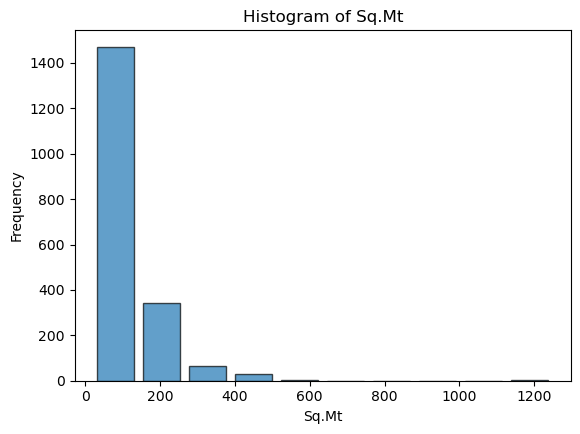

In [42]:
# Histogram
plt.hist(data["Sq.Mt"], bins=10, edgecolor='black', alpha=0.7, rwidth=0.8)

# Labels and title
plt.xlabel('Sq.Mt')
plt.ylabel('Frequency')
plt.title('Histogram of Sq.Mt')

# Spacing between bars
plt.subplots_adjust(bottom=0.15)

plt.show()

## Part 5:Remove all rows with Floor>20

In [ ]:
data.drop(data[data['Floor']>20].index, inplace=True) # I am dropping the all the rows with values larger than 20 for the feature "Floor"

In [19]:
data["Floor"].max()  
# i did the max for floor to make sure that every other values more than 20 are removed and i also did a feature search in the excel file to make sure value 20 exist(check image below)

20.0

In [20]:
data.shape # there are 7 rows which are removed after the removal of rows that has floor>20 , 1917 rows --> 1910 rows

(1910, 11)

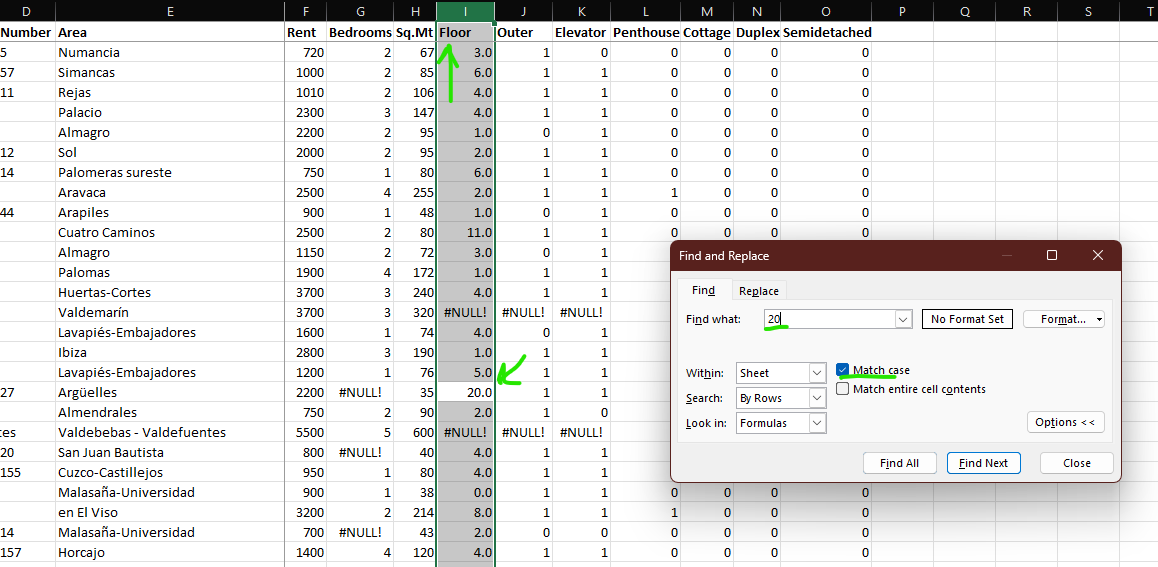

## Part 6: Split data to train (70%) and val (15%) and test (15%)


In [21]:
train, test = train_test_split(data, test_size=0.3, random_state=111)

In [22]:
data.shape

(1910, 11)

In [23]:
train.shape

(1337, 11)

In [24]:
test.shape

(573, 11)

In [25]:
test, val = train_test_split(test, test_size=0.5, random_state=222)

In [26]:
test.shape

(286, 11)

In [27]:
val.shape

(287, 11)

## Part 7: Impact encode "Area" with respect to target variable ("Rent"), replacing the original column with the encoded column.

Note that the encoding is computed only using the training set, but must be applied to the val and test set as well.  If the val/test set contain rows with "Area" that was not observed in the training, then the encoding cannot be computed for those rows, and they should be removed.

In [28]:
train["Area"] = train["Area"].astype("category")

In [29]:
train.dtypes

Area            category
Rent               int64
Bedrooms         float64
Sq.Mt              int64
Floor            float64
Outer            float64
Elevator         float64
Penthouse          int64
Cottage            int64
Duplex             int64
Semidetached       int64
dtype: object

In [30]:
train["Area"].cat.categories

Index(['12 de Octubre-Orcasur', 'Abrantes', 'Acacias', 'Adelfas', 'Almagro',
       'Almendrales', 'Aluche', 'Ambroz', 'Apóstol Santiago', 'Arapiles',
       ...
       'Ventas', 'Ventilla-Almenara', 'Vinateros', 'Vista Alegre', 'ZofÁ­o',
       'en Almagro', 'en El Viso', 'en Nueva España', 'en Trafalgar',
       'plaza de España'],
      dtype='object', length=130)

In [31]:
stats = train['Rent'].groupby(train['Area']).agg(['mean']) ## Impact (Stats) encoding
stats

,mean
Area,
12 de Octubre-Orcasur,780.000000
Abrantes,773.750000
Acacias,1308.250000
Adelfas,1550.000000
Almagro,3208.571429
...,...
en Almagro,4650.000000
en El Viso,3557.000000
en Nueva España,3500.000000


In [32]:
mapper = {s : stats.loc[s,'mean'] for s in stats.index }
train["Area_impact"] = train["Area"].map(mapper)
train

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Area_impact
1921,Malasaña-Universidad,2430,2.0,80,2.0,1.0,1.0,0,0,0,0,1534.516129
1758,Recoletos,2000,1.0,85,9.0,1.0,1.0,0,0,0,0,3470.411765
732,Goya,1400,2.0,78,3.0,1.0,1.0,0,0,0,0,2317.800000
1467,Trafalgar,1100,1.0,50,6.0,1.0,0.0,0,0,0,0,1775.750000
674,Vallehermoso,1500,3.0,111,4.0,1.0,1.0,0,0,0,0,2039.230769
...,...,...,...,...,...,...,...,...,...,...,...,...
1420,Barajas,1400,3.0,125,7.0,1.0,1.0,0,0,0,0,1208.636364
97,Abrantes,730,3.0,61,2.0,1.0,0.0,0,0,0,0,773.750000
786,Ibiza,1600,2.0,130,2.0,1.0,1.0,0,0,0,0,1968.333333
944,Goya,2565,1.0,90,3.0,0.0,1.0,0,0,0,0,2317.800000


In [33]:
train.isna().sum()

Area            0
Rent            0
Bedrooms        0
Sq.Mt           0
Floor           0
Outer           0
Elevator        0
Penthouse       0
Cottage         0
Duplex          0
Semidetached    0
Area_impact     0
dtype: int64

In [34]:
test["Area_impact"] = test["Area"].map(mapper) #apply it also to test set
test 

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Area_impact
1088,Nueva España,2350,4.0,171,11.0,1.0,1.0,0,0,0,0,2397.848485
498,Canillas,700,2.0,62,2.0,1.0,0.0,0,0,0,0,832.500000
1560,Fuente del Berro,1350,3.0,82,1.0,1.0,1.0,0,0,0,0,1498.333333
1204,Ibiza,1300,3.0,90,3.0,0.0,1.0,0,0,0,0,1968.333333
1320,Almagro,4000,4.0,260,2.0,1.0,1.0,0,0,0,0,3208.571429
...,...,...,...,...,...,...,...,...,...,...,...,...
1868,Moscardó,1280,3.0,90,2.0,1.0,1.0,0,0,0,0,675.000000
277,San Diego,550,2.0,60,3.0,1.0,0.0,0,0,0,0,665.357143
517,Sol,1700,1.0,80,5.0,1.0,1.0,1,0,0,0,1789.523810
1228,Ibiza,1600,3.0,130,1.0,1.0,1.0,0,0,0,0,1968.333333


In [35]:
test.isna().sum() # here we make sure if there are any rows that were not observed in train and if yes we drop or remove them

Area            0
Rent            0
Bedrooms        0
Sq.Mt           0
Floor           0
Outer           0
Elevator        0
Penthouse       0
Cottage         0
Duplex          0
Semidetached    0
Area_impact     3
dtype: int64

In [36]:
test = test.dropna() 
test.isna().sum()

Area            0
Rent            0
Bedrooms        0
Sq.Mt           0
Floor           0
Outer           0
Elevator        0
Penthouse       0
Cottage         0
Duplex          0
Semidetached    0
Area_impact     0
dtype: int64

In [37]:
val["Area_impact"] = val["Area"].map(mapper) # apply it also to the validation set
val

,Area,Rent,Bedrooms,Sq.Mt,Floor,Outer,Elevator,Penthouse,Cottage,Duplex,Semidetached,Area_impact
1239,Ibiza,1900,2.0,100,2.0,1.0,1.0,0,0,0,0,1968.333333
853,Guindalera,1350,3.0,89,1.0,1.0,1.0,0,0,0,0,1249.666667
1226,San Isidro,699,3.0,80,3.0,1.0,1.0,0,0,0,0,792.222222
835,Cuatro Caminos,2300,3.0,150,2.0,1.0,1.0,0,0,0,0,2030.735294
2051,Águilas,790,3.0,80,6.0,1.0,1.0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1166,Gaztambide,1100,2.0,46,8.0,1.0,1.0,1,0,0,0,1282.500000
1748,Almagro,2900,2.0,115,10.0,1.0,1.0,0,0,0,0,3208.571429
1092,Bellas Vistas,900,1.0,45,1.0,1.0,1.0,0,0,0,0,927.500000
2037,Lista,850,2.0,40,0.0,0.0,1.0,0,0,0,0,2013.285714


In [38]:
val.isna().sum() # here we make sure if there are any rows that were not observed in train and if yes we drop or remove them

Area            0
Rent            0
Bedrooms        0
Sq.Mt           0
Floor           0
Outer           0
Elevator        0
Penthouse       0
Cottage         0
Duplex          0
Semidetached    0
Area_impact     6
dtype: int64

In [39]:
val = val.dropna() 
val.isna().sum()

Area            0
Rent            0
Bedrooms        0
Sq.Mt           0
Floor           0
Outer           0
Elevator        0
Penthouse       0
Cottage         0
Duplex          0
Semidetached    0
Area_impact     0
dtype: int64